To run this code you are going to have to create a virtual enviornment, and then install libraries in that virtual enviornment.

In [1]:
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Flatten
from tensorflow.keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.utils import pad_sequences
import pandas as pd

df = pd.read_csv('data/ham-vs-spam.csv')
df.head()

2022-10-19 16:39:38.498580: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


,IsSpam,Text
0,0,key issues going forwarda year end reviews rep...
1,0,congrats contratulations the execution the cen...
2,0,key issues going forwardall under control set...
3,0,epmi files protest entergy transcoattached our...
4,0,california power please contact kristin walsh ...


In [2]:
df = df.drop_duplicates()
df.groupby('IsSpam').describe()

Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        499    499  key issues going forwarda year end reviews rep...    1
1        500    500  take the reinsbecomeyour employer substantial ...    1

In [15]:
df = df.sample(frac=1)

X = df['Text']

y = df['IsSpam']

X_text = X

In [19]:
X

55     entouchif your team would like contribute this...
421    corporate culture committee meetingreminder th...
245     pierceozzie follow our phone conversation how...
653    press release immediate distributioncommunique...
978    you can find unimaginable savings alium get ha...
                             ...                        
498     gtv weekly status updatehi louise tried call ...
968    award notification file for claim allianz lott...
422    epc negotiation teamlouise this good still nee...
503    your winning notice pacific international lott...
925    top quality medication herebassi abridgment ta...
Name: Text, Length: 999, dtype: object

In [22]:
# Limiting our tokenizers vocab size
max_words = 20000
 
    
# create the tokenizer
tokenizer = Tokenizer(num_words=max_words)


# Fit the tokenizer
tokenizer.fit_on_texts(X)


# Create the sequences for each sentence, basically turning each word into its index position
sequences = tokenizer.texts_to_sequences(X)


index_word = tokenizer.index_word


# # Limiting our sequencer to only include 500 words
max_length = 500


# # Convert the sequences to all be the same length of 500
X = pad_sequences(sequences, maxlen=max_length, padding='post')
print(X.shape)

(999, 500)


In [24]:
for s, p in zip(sequences, X):
    print(len(s), len(p))

22 500
57 500
171 500
285 500
36 500
718 500
94 500
9 500
32 500
123 500
176 500
33 500
597 500
190 500
35 500
36 500
36 500
132 500
6 500
33 500
146 500
38 500
49 500
49 500
342 500
46 500
200 500
299 500
129 500
467 500
293 500
8 500
17 500
247 500
120 500
263 500
262 500
78 500
109 500
51 500
10 500
102 500
39 500
588 500
659 500
159 500
12 500
668 500
35 500
239 500
328 500
218 500
53 500
11 500
134 500
87 500
126 500
315 500
87 500
30 500
41 500
306 500
40 500
81 500
692 500
20 500
35 500
53 500
26 500
22 500
82 500
54 500
62 500
93 500
75 500
41 500
780 500
399 500
25 500
44 500
73 500
32 500
169 500
99 500
59 500
63 500
99 500
274 500
81 500
295 500
104 500
29 500
84 500
158 500
138 500
62 500
39 500
28 500
28 500
250 500
82 500
7 500
31 500
55 500
719 500
196 500
126 500
40 500
53 500
363 500
163 500
684 500
203 500
34 500
184 500
24 500
110 500
42 500
103 500
270 500
92 500
26 500
35 500
369 500
481 500
46 500
77 500
127 500
122 500
63 500
8 500
661 500
84 500
226 500
22 500
1

In [20]:
print(X_text.iloc[0])

print(sequences[0])

for ix in sequences[0]:
    print(ix, index_word[ix])

entouchif your team would like contribute this week newsletter please submit your business highlight quoteby noon wednesday february thank you kathie grabstaldx 
[9285, 14, 189, 18, 55, 5753, 5, 81, 1527, 21, 3166, 14, 67, 3665, 9286, 4422, 338, 791, 324, 4, 3666, 5754]
9285 entouchif
14 your
189 team
18 would
55 like
5753 contribute
5 this
81 week
1527 newsletter
21 please
3166 submit
14 your
67 business
3665 highlight
9286 quoteby
4422 noon
338 wednesday
791 february
324 thank
4 you
3666 kathie
5754 grabstaldx


In [ ]:
X[0]

In [25]:
first_document_tokens = X[0] 
for ix in first_document_tokens:
    try:
        print(ix, tokenizer.index_word[ix])
    except:
        pass

9285 entouchif
14 your
189 team
18 would
55 like
5753 contribute
5 this
81 week
1527 newsletter
21 please
3166 submit
14 your
67 business
3665 highlight
9286 quoteby
4422 noon
338 wednesday
791 february
324 thank
4 you
3666 kathie
5754 grabstaldx


In [27]:
X_text.iloc[0]

'entouchif your team would like contribute this week newsletter please submit your business highlight quoteby noon wednesday february thank you kathie grabstaldx '

In [34]:
# This creates the Neural Network
model = Sequential() 

# This embedding layer basically will automatically create the word2vec vectors based on your text data.
model.add( Embedding(max_words, 32, input_length=max_length) ) 


model.add(Flatten())

model.add(Dense(128, activation='relu'))


model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 32)           640000    
                                                                 
 flatten_1 (Flatten)         (None, 16000)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2048128   
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,688,257
Trainable params: 2,688,257
Non-trainable params: 0
_________________________________________________________________


The Embedding layer can be understood as a lookup table that maps from integer indices (which stand for specific words) to dense vectors (their embeddings). The dimensionality (or width) of the embedding is a parameter you can experiment with to see what works well for your problem, much in the same way you would experiment with the number of neurons in a Dense layer.

In [31]:
# https://www.tensorflow.org/text/guide/word_embeddings
# embedding_layer = Embedding(max_words, 32, input_length=max_length)

# embedding_layer(X[0])

<tf.Tensor: shape=(500, 32), dtype=float32, numpy=
array([[ 0.04874035, -0.03094007, -0.0055414 , ..., -0.01479416,
         0.02978197, -0.02562563],
       [-0.02788826,  0.02898352, -0.01336724, ..., -0.02806983,
        -0.03469794,  0.00247731],
       [-0.02055254,  0.03038791, -0.0217268 , ..., -0.00741786,
         0.00968505, -0.04499101],
       ...,
       [-0.04532436,  0.04281588,  0.02840025, ...,  0.00789671,
        -0.0007197 ,  0.00187925],
       [-0.04532436,  0.04281588,  0.02840025, ...,  0.00789671,
        -0.0007197 ,  0.00187925],
       [-0.04532436,  0.04281588,  0.02840025, ...,  0.00789671,
        -0.0007197 ,  0.00187925]], dtype=float32)>

In [35]:
# this trains your neural network, and reports the accuracy and loss for each epoch
hist = model.fit(X, y, 
                 validation_split=0.2, 
                 epochs=20, batch_size=20)

Epoch 1/20
40/40 [==============================] - 2s 21ms/step - loss: 0.6883 - accuracy: 0.5782 - val_loss: 0.5881 - val_accuracy: 0.7050
Epoch 2/20
40/40 [==============================] - 1s 15ms/step - loss: 0.3723 - accuracy: 0.8561 - val_loss: 0.2208 - val_accuracy: 0.9550
Epoch 3/20
40/40 [==============================] - 1s 17ms/step - loss: 0.0822 - accuracy: 0.9712 - val_loss: 0.0972 - val_accuracy: 0.9650
Epoch 4/20
40/40 [==============================] - 1s 20ms/step - loss: 0.0253 - accuracy: 0.9900 - val_loss: 0.0757 - val_accuracy: 0.9700
Epoch 5/20
40/40 [==============================] - 1s 18ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0742 - val_accuracy: 0.9750
Epoch 6/20
40/40 [==============================] - 1s 17ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.0899 - val_accuracy: 0.9550
Epoch 7/20
40/40 [==============================] - 1s 18ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.0687 - val_accuracy: 0.9750
Epoch 8/20
40

[]

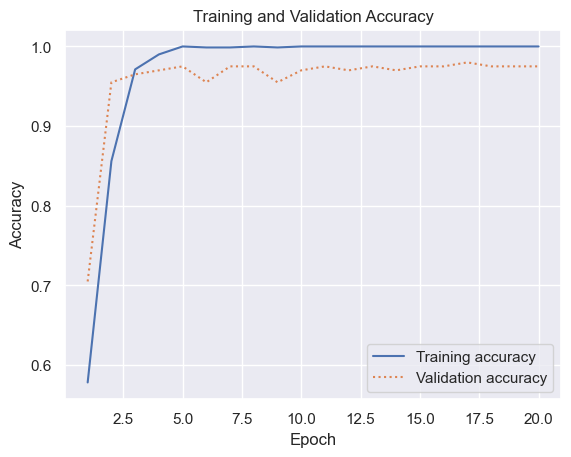

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [38]:
cleaned_text = 'Why pay more for expensive meds when you can order them online and save $$$?'
sequence = tokenizer.texts_to_sequences([cleaned_text])
padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
model.predict(padded_sequence)[0][0]

1/1 [==============================] - 0s 23ms/step


0.9996383

In [39]:
print('sequence:\n', sequence)
print('-'*79)
print('padded_sequence:\n', padded_sequence)
print('-'*79)

for ix in sequence[0]:
    print( 'index position of word in tokenizer:', ix, ',  word:', tokenizer.index_word[ix])

sequence:
 [[515, 188, 29, 3, 1356, 723, 112, 4, 23, 110, 106, 164, 2, 329]]
-------------------------------------------------------------------------------
padded_sequence:
 [[ 515  188   29    3 1356  723  112    4   23  110  106  164    2  329
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0  

In [40]:
cleaned_text = 'hey jon, I cannot make the meeting tomorrow. can you please send me a time that you can meet on tuesday. thanks, harry'
sequence = tokenizer.texts_to_sequences([cleaned_text])
padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
model.predict(padded_sequence)


1/1 [==============================] - 0s 29ms/step


array([[0.02137492]], dtype=float32)

In [41]:
cleaned_text = 'Can you attend a code review on Tuesday? Need to make sure the logic is rock solid.'
sequence = tokenizer.texts_to_sequences([cleaned_text])
padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
model.predict(padded_sequence)

1/1 [==============================] - 0s 29ms/step


array([[0.15258785]], dtype=float32)

In [42]:
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
 
    
# This creates a convolutional neural network
# https://www.tensorflow.org/tutorials/images/cnn
model = Sequential()

model.add(Embedding(max_words, 32, input_length=max_length))

model.add(Conv1D(32, 7, activation='relu'))

model.add(MaxPooling1D(5))

model.add(Conv1D(32, 7, activation='relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 32)           640000    
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           7200      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 1)                

In [43]:
hist = model.fit(X, y, validation_split=0.2, epochs=6, batch_size=20)

Epoch 1/6


/Users/zacharydesario/Desktop/NLP-extra-credit/env/lib/python3.8/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


40/40 [==============================] - 2s 31ms/step - loss: 0.6816 - accuracy: 0.6045 - val_loss: 0.6515 - val_accuracy: 0.6700
Epoch 2/6
40/40 [==============================] - 1s 26ms/step - loss: 0.5376 - accuracy: 0.7910 - val_loss: 0.3728 - val_accuracy: 0.9150
Epoch 3/6
40/40 [==============================] - 1s 27ms/step - loss: 0.1520 - accuracy: 0.9712 - val_loss: 0.1061 - val_accuracy: 0.9700
Epoch 4/6
40/40 [==============================] - 1s 28ms/step - loss: 0.0300 - accuracy: 0.9950 - val_loss: 0.0792 - val_accuracy: 0.9700
Epoch 5/6
40/40 [==============================] - 1s 28ms/step - loss: 0.0144 - accuracy: 0.9950 - val_loss: 0.0660 - val_accuracy: 0.9750
Epoch 6/6
40/40 [==============================] - 1s 31ms/step - loss: 0.0100 - accuracy: 0.9975 - val_loss: 0.0620 - val_accuracy: 0.9800


In [44]:
cleaned_text = 'Why pay more for expensive meds when you can order them online and save $$$?'
sequence = tokenizer.texts_to_sequences([cleaned_text])
padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
model.predict(padded_sequence)

1/1 [==============================] - 0s 111ms/step


array([[0.9876542]], dtype=float32)

In [45]:
cleaned_text = 'hey jon, I cannot make the meeting tomorrow. can you please send me a time that you can meet on tuesday. thanks, harry'
sequence = tokenizer.texts_to_sequences([cleaned_text])
padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
model.predict(padded_sequence)



1/1 [==============================] - 0s 26ms/step


array([[0.00973387]], dtype=float32)

In [46]:
cleaned_text = 'Can you attend a code review on Tuesday? Need to make sure the logic is rock solid.'
sequence = tokenizer.texts_to_sequences([cleaned_text])
padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
model.predict(padded_sequence)

1/1 [==============================] - 0s 24ms/step


array([[0.13606402]], dtype=float32)